# Hyperparameter Optimization

In [29]:
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Get the dataset: make moons from sklearn 🌙

In [30]:
X, y = make_moons(n_samples=200, noise=0.3)

In [31]:
y

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0])

In [32]:
X

array([[ 1.80684619e+00, -3.20638282e-01],
       [ 6.80487402e-01, -9.39746783e-02],
       [ 1.36657717e-01, -9.74208669e-02],
       [ 6.38867771e-01,  4.68338377e-01],
       [ 2.15581401e-01,  1.85967194e-01],
       [-9.87506771e-01,  5.26593921e-01],
       [ 1.60735060e+00,  2.50662065e-01],
       [ 4.56364525e-02,  6.08355633e-01],
       [-1.07687704e+00,  3.80154794e-01],
       [ 1.06869077e+00,  4.04548840e-01],
       [ 7.51585407e-01, -1.63203322e-01],
       [-1.35057616e+00,  4.62005120e-01],
       [ 1.51691169e-01, -1.23407102e-01],
       [ 5.28682868e-01, -2.54348321e-01],
       [-5.21247405e-01,  1.09981119e+00],
       [ 1.01802955e-01, -1.23438915e-01],
       [-1.37063547e-01,  7.16148871e-01],
       [ 6.95588835e-01,  9.24955373e-01],
       [ 2.21784464e-02,  9.04291224e-01],
       [-3.67709431e-01,  1.04212902e+00],
       [ 2.01637710e+00, -5.38912246e-01],
       [ 1.09202946e+00,  4.22758861e-01],
       [ 1.69946823e-01,  6.88662793e-01],
       [ 8.

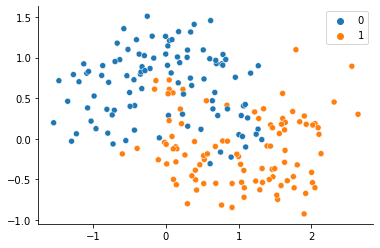

In [33]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
sns.despine()

# Example: Random Forest  🌲🌳

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [36]:
m = RandomForestClassifier(n_estimators=2)

In [37]:
m.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=2)

In [38]:
training_score = m.score(Xtrain, ytrain)

In [39]:
training_score

0.9533333333333334

## Cross-validation

In [40]:
from IPython.display import Image

Image(filename='cross_val.png',width=500) 

FileNotFoundError: [Errno 2] No such file or directory: 'cross_val.png'


> With cross-validation, we don't need a separate validation dataset. We can use all our training data for model fitting and selection!

* With cross-validation, we can see if our model is overfitting, without touching the test data. 
* The training-data gets split again into k smaller sets and we get back k validation scores. 
* The mean of these scores can then be compared to our training score.

In [41]:
from sklearn.model_selection import cross_val_score  #Run cross-validation for single metric evaluation.

In [42]:
cross_acc = cross_val_score(m,   # estimator: # the model you want to evaluate 
                      Xtrain,         # the training input data 
                      ytrain,         # the training output data  
                      cv=10,          # number of cross validation datasets    
                      scoring='accuracy') # evaluation metric 

In [43]:
cross_acc

array([0.93333333, 0.73333333, 0.93333333, 0.86666667, 0.73333333,
       0.93333333, 0.73333333, 0.86666667, 0.8       , 0.6       ])

In [44]:
# Comparing mean of the cv-scores with our training score
cross_acc.mean()   

0.8133333333333332

In [45]:
training_score
# We are overfitting! 

0.9533333333333334

If **training score >> mean(validation_scores)**, then you are overfitting.

If there is **high variation** in the validation scores, then you have high sampling bias! You probably need more data, pick a different model or change the hyperparameters.

## Grid Search  🕵️‍♀️

Instead of trying out different hyperparameters and -values manually, we can use a Grid Search, where we provide a dictionary with parameters that will be "searched" for the best model. 

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
rf_opti = RandomForestClassifier()

In [48]:
# define our hyperparameters to combine
hyperparams = {
    'max_depth': [2, 5, 10, 20], 
    'n_estimators': [5, 10, 50, 90],
    'min_samples_leaf': [1,5,10]
}

In [49]:
g = GridSearchCV(rf_opti, hyperparams, cv=10, scoring='r2')

In [50]:
# fit all models with all the different hyperparamters
g.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [5, 10, 50, 90]},
             scoring='r2')

### Inspecting the results

In [51]:
g.best_params_    

{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 10}

In [52]:
pd.DataFrame(g.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007084,0.002985,0.000967,0.000406,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.732143,0.732143,...,0.464286,0.464286,-0.071429,0.464286,0.196429,0.196429,0.196429,0.410714,0.262445,44
1,0.006861,0.000251,0.000704,0.000024,2,1,10,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.464286,0.732143,...,0.732143,0.196429,-0.339286,0.464286,0.732143,0.196429,0.464286,0.437500,0.326961,37
2,0.032075,0.000085,0.002290,0.000020,2,1,50,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.464286,0.732143,...,0.196429,0.464286,-0.339286,0.732143,0.732143,0.464286,0.464286,0.464286,0.316933,33
3,0.057274,0.000269,0.003883,0.000078,2,1,90,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.732143,0.732143,...,0.732143,0.464286,-0.339286,0.732143,0.732143,0.196429,0.464286,0.517857,0.334553,17
4,0.003481,0.000016,0.000483,0.000024,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.732143,0.732143,...,0.464286,0.464286,-0.071429,0.464286,0.732143,0.196429,0.196429,0.491071,0.304227,25
5,0.006715,0.000080,0.000697,0.000025,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.732143,0.732143,...,0.732143,0.464286,-0.071429,0.464286,0.464286,0.196429,0.196429,0.464286,0.267857,34
6,0.032219,0.000635,0.002314,0.000052,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.732143,0.732143,...,0.732143,0.464286,-0.071429,0.732143,0.732143,0.196429,0.464286,0.544643,0.269193,10
7,0.057171,0.000361,0.003931,0.000233,2,5,90,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.732143,0.732143,...,0.464286,0.464286,-0.339286,0.732143,0.732143,0.196429,0.464286,0.491071,0.326961,28
8,0.003548,0.000084,0.000493,0.000028,2,10,5,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.732143,0.732143,...,0.464286,0.464286,-0.607143,0.732143,0.732143,0.196429,0.196429,0.437500,0.405341,37
9,0.006653,0.000035,0.000685,0.000008,2,10,10,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.732143,0.732143,...,0.464286,0.464286,-0.339286,0.196429,0.732143,0.196429,0.464286,0.437500,0.326961,36


## Making predictions with the best model

In [53]:
# this is the best model our gridsearch found! with the parameters from best.params_
rf_best = g.best_estimator_

In [54]:
rf_best.predict(Xtest)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1])

In [55]:
rf_best.score(Xtrain, ytrain)

0.9666666666666667

In [56]:
rf_best.score(Xtest, ytest)

0.9

# The End!

Machine learning libary: http://rasbt.github.io/mlxtend/